In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


## Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

import warnings

### Understanding the data

In [3]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
print('Training set shape:', df_train.shape)

df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
print('Testing set shape:', df_test.shape)

Training set shape: (1460, 81)
Testing set shape: (1459, 80)


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
def df_characteristics(df):
    print('Shape of the dataset: {}'.format(df.shape))
    
    df_numerical = df.select_dtypes(include = [np.number])
    print('Number of Numerical Features: {}'.format(df_numerical.shape[1]))
    df_categorical = df.select_dtypes(exclude = [np.number])
    print('Number of Categorical Features: {}'.format(df_categorical.shape[1]))

In [6]:
df_characteristics(df_train)

Shape of the dataset: (1460, 81)
Number of Numerical Features: 38
Number of Categorical Features: 43


In [7]:
df_characteristics(df_test)

Shape of the dataset: (1459, 80)
Number of Numerical Features: 37
Number of Categorical Features: 43


List of Numerical Features:

In [8]:
df_numerical = df_train.select_dtypes(include = [np.number])
numerical_features = df_numerical.columns
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

List of Categorical Features

In [9]:
df_categorical = df_train.select_dtypes(exclude = [np.number])
categorical_features = df_categorical.columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Exploratory Data Analysis

### Missing Data

Define a function to find out the percentage of missing values in respective features in both training and test sets.

In [10]:
def check_null(df):
    null_percent = (df.isnull().sum() / len(df)) * 100
    
    try:
        null_percent = (null_percent.drop(null_percent[null_percent == 0].index)).sort_values(ascending=False)
        
    except:
        print('There is No null values in the dataset')
        print('Returning the dataset...')
        return df
    
    return null_percent

Representation of missing values in percentage

In [11]:
train_nan = check_null(df_train)
test_nan = check_null(df_test)

nan = pd.DataFrame({'Train(%)': train_nan, 'Test(%)': test_nan})
nan.sort_values(by='Train(%)', ascending=False)

,Train(%),Test(%)
PoolQC,99.520548,99.794380
MiscFeature,96.301370,96.504455
Alley,93.767123,92.666210
Fence,80.753425,80.123372
FireplaceQu,47.260274,50.034270
LotFrontage,17.739726,15.558602
GarageFinish,5.547945,5.346127
GarageQual,5.547945,5.346127
GarageType,5.547945,5.209047
GarageYrBlt,5.547945,5.346127


### Handling the missing data

#### 1. Dropping the irrelevant features
As `PoolQC`, `MiscFeature`, `Alley` and `Fence` are highly null (above 90%), We shall drop them.

In [12]:
columns_drop = ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence']

df_train.drop(columns = columns_drop, axis=1, inplace=True)
df_test.drop(columns = columns_drop, axis=1, inplace=True)

#### 2. FireplaceQu : Fireplace Quality


Ex  - Excellent  
Gd  - Good  
TA  - Average  
Fa  - Fair  
Po  - Poor  
NA  - No Fireplace

In [13]:
df_train.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

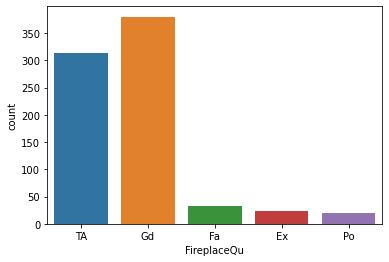

In [14]:
sns.countplot(df_train['FireplaceQu'])

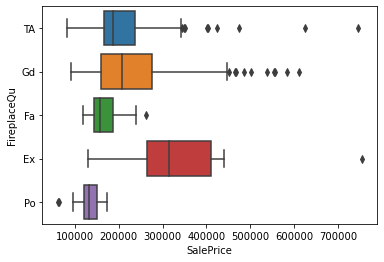

In [15]:
sns.boxplot(data=df_train, x='SalePrice', y='FireplaceQu')

As this feature directly related with our target column, it would be better if we fill it with **0**.

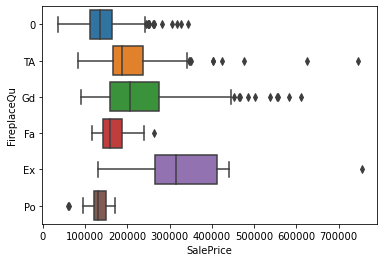

In [16]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna(0)
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna(0)

sns.boxplot(data=df_train, x='SalePrice', y='FireplaceQu')

#### 3. LotFrontage: Linear feet of street connected to property

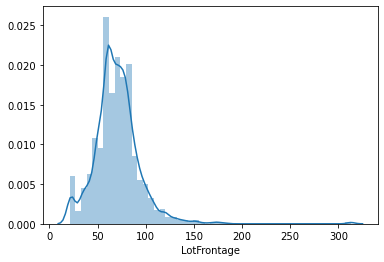

In [17]:
sns.distplot(df_train.LotFrontage)

In [18]:
def LotFrontage_Stats(df):
    print('Mean: {}, Medain: {}'.format(df.LotFrontage.mean(), 
                                        df.LotFrontage.median()))
    
LotFrontage_Stats(df_train)  # training set
LotFrontage_Stats(df_test)  # testing set

Mean: 70.04995836802665, Medain: 69.0
Mean: 68.58035714285714, Medain: 67.0


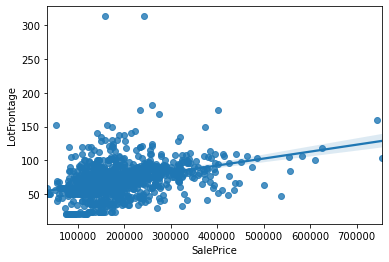

In [19]:
sns.regplot(data=df_train, x='SalePrice', y='LotFrontage')

The difference between Mean and Medain for both training and test set is very little, so let's fill the missing values with Median.

In [20]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].median())

#### 4. GarageQual: Garage Quality

In [21]:
df_train['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

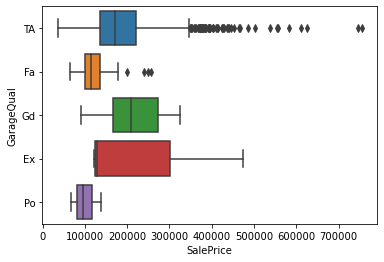

In [22]:
sns.boxplot(data=df_train, x='SalePrice', y='GarageQual')

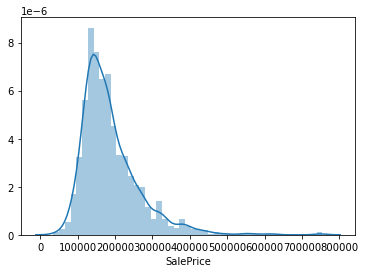

In [23]:
sns.distplot(df_train[df_train['GarageQual'] == 'TA'].SalePrice)

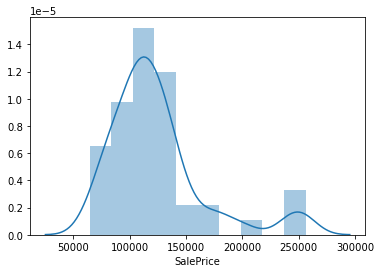

In [24]:
sns.distplot(df_train[df_train['GarageQual'] == 'Fa'].SalePrice)

Dropping this feature will not affect our model badly. So let's drop it.

In [25]:
df_train.drop('GarageQual', axis=1, inplace=True)
df_test.drop('GarageQual', axis=1, inplace=True)

#### 5. GarageFinish: Interior finish of the garage

Fin - Finished  
RFn - Rough Finished  
Unf - Unfinished  
Nog  - No Garage

In [26]:
df_train.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

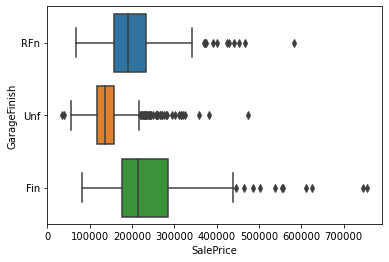

In [27]:
sns.boxplot(data=df_train, x='SalePrice', y='GarageFinish')

This feature is good as the value difference in the categories is not too big. Let's create a new category for NaN values called `Nog`

In [28]:
df_train['GarageFinish'] = df_train['GarageFinish'].fillna('Nog')
df_test['GarageFinish'] = df_test['GarageFinish'].fillna('Nog')

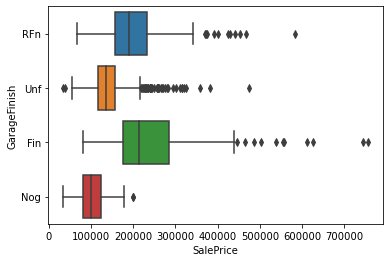

In [29]:
sns.boxplot(data=df_train, x='SalePrice', y='GarageFinish')

#### 6. GarageCond : Garage Condition

In [30]:
df_train.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

Here also we will replace NaN values with `Nog` ie., NoGarage and see the results.

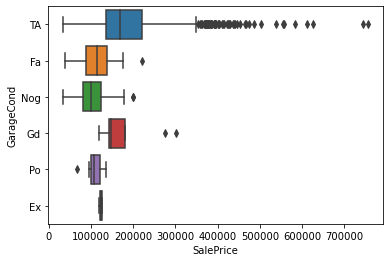

In [31]:
df_train['GarageCond'] = df_train['GarageCond'].fillna('Nog')

sns.boxplot(data=df_train, x='SalePrice', y='GarageCond')

I don't think this feature is much helpful to our model, so let's drop it.

In [32]:
df_train.drop('GarageCond', axis=1, inplace=True)
df_test.drop('GarageCond', axis=1, inplace=True)

#### 7. GarageYrBlt: Year garage was built

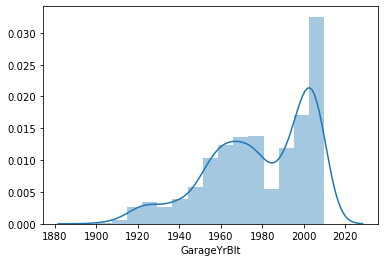

In [33]:
sns.distplot(df_train.GarageYrBlt)

In [34]:
print('Maximum value: {}'.format(df_train.GarageYrBlt.max()))
print('Minimun value: {}'.format(df_train.GarageYrBlt.min()))

Maximum value: 2010.0
Minimun value: 1900.0


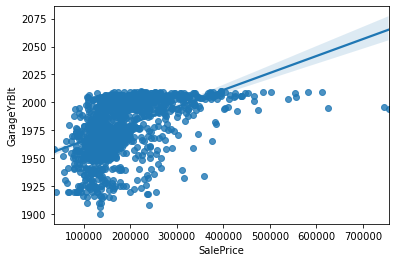

In [35]:
sns.regplot(data=df_train, x='SalePrice', y='GarageYrBlt')

Let's fill it with minimun value

In [36]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train.GarageYrBlt.min())
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test.GarageYrBlt.min())

#### 8. GarageType: Garage Location

In [37]:
df_train.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

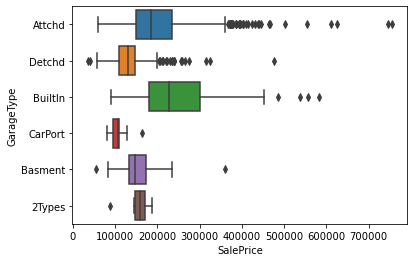

In [38]:
sns.boxplot(data=df_train, x='SalePrice', y='GarageType')

Here also we will replace NaN values with `Nog` ie., NoGarage and see the results.

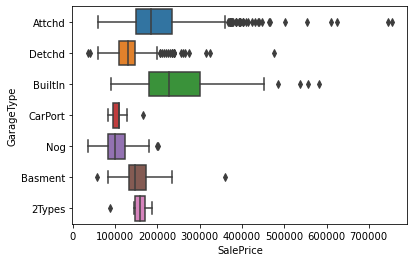

In [39]:
df_train['GarageType'] = df_train['GarageType'].fillna('Nog')
df_test['GarageType'] = df_test['GarageType'].fillna('Nog')

sns.boxplot(data=df_train, x='SalePrice', y='GarageType')

#### 9. BsmtQual : Evaluates the height of basement

In [40]:
df_train.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

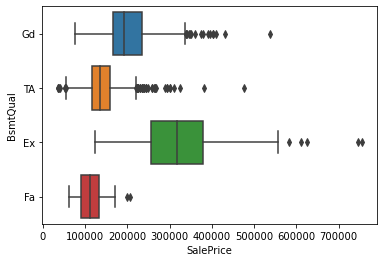

In [41]:
sns.boxplot(data=df_train, x='SalePrice', y='BsmtQual')

Create a new category `NoBsmt` for NaN values.

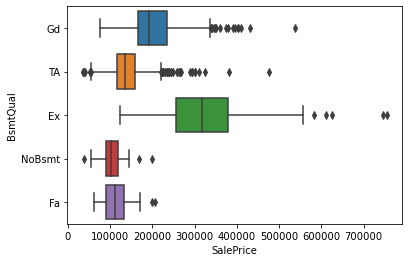

In [42]:
df_train['BsmtQual'] = df_train['BsmtQual'].fillna('NoBsmt')
df_test['BsmtQual'] = df_test['BsmtQual'].fillna('NoBsmt')

sns.boxplot(data=df_train, x='SalePrice', y='BsmtQual')

#### 10. BsmtCond : Evaluates the general condition of the basement

In [43]:
df_train.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

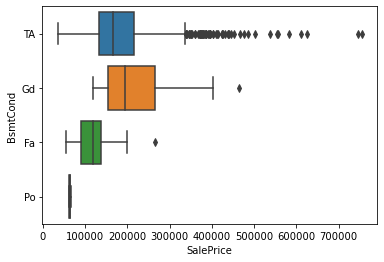

In [44]:
sns.boxplot(data=df_train, x='SalePrice', y='BsmtCond')

This feature won't help much to our model. So, let's drop it.

In [45]:
df_train.drop('BsmtCond', axis=1, inplace=True)
df_test.drop('BsmtCond', axis=1, inplace=True)

#### 11. BsmtExposure : Refers to walkout or garden level walls

   Gd -  Good Exposure  
   Av -  Average Exposure   
   Mn -  Mimimum Exposure  
   No -  No Exposure  
   NA -  No Basement  

In [46]:
df_train.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

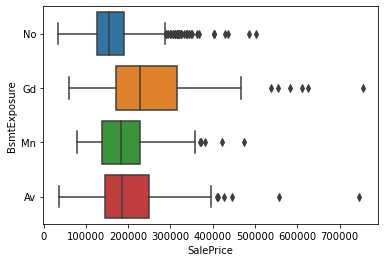

In [47]:
sns.boxplot(data=df_train, x='SalePrice', y='BsmtExposure')

Creating a new category `NoBsmt` for NaN values.

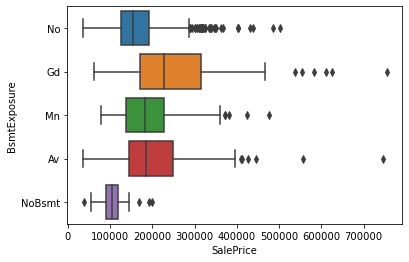

In [48]:
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('NoBsmt')
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna('NoBsmt')

sns.boxplot(data=df_train, x='SalePrice', y='BsmtExposure')

#### 12.BsmtFinType1: Rating of basement finished area

   GLQ - Good Living Quarters  
   ALQ - Average Living Quarters  
   BLQ - Below Average Living Quarters     
   Rec - Average Rec Room  
   LwQ - Low Quality  
   Unf - Unfinshed  
   NA  - No Basement  

In [49]:
df_train.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

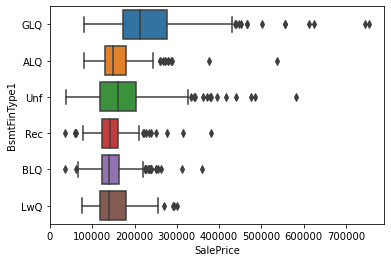

In [50]:
sns.boxplot(data=df_train, x='SalePrice', y='BsmtFinType1')

Creating a new category `NoBsmt` for NaN values.

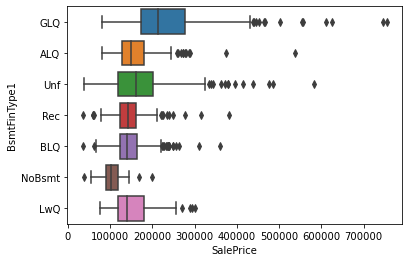

In [51]:
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna('NoBsmt')
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna('NoBsmt')

sns.boxplot(data=df_train, x='SalePrice', y='BsmtFinType1')

#### 13.BsmtFinType2: Rating of basement finished area (if multiple types)

In [52]:
df_train.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

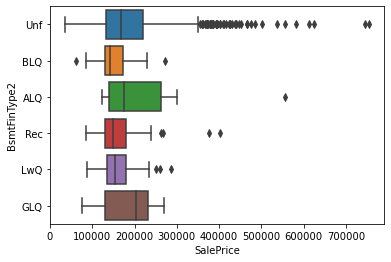

In [53]:
sns.boxplot(data=df_train, x='SalePrice', y='BsmtFinType2')

Dropping this one would be okay because it is not going to help our model

In [54]:
df_train.drop('BsmtFinType2', axis=1, inplace=True)
df_test.drop('BsmtFinType2', axis=1, inplace=True)

#### 14. MasVnrType : Masonary Veneer Type

   BrkCmn  - Brick Common  
   BrkFace - Brick Face  
   CBlock  - Cinder Block  
   Stone   - Stone  
   None - None  
   

In [55]:
df_train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

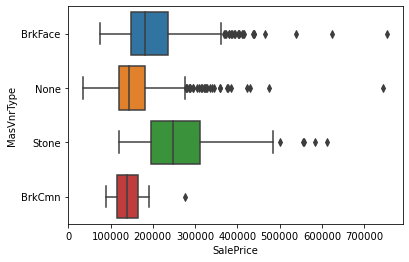

In [56]:
sns.boxplot(data=df_train, x='SalePrice', y='MasVnrType')

Fill the missing values with `None`

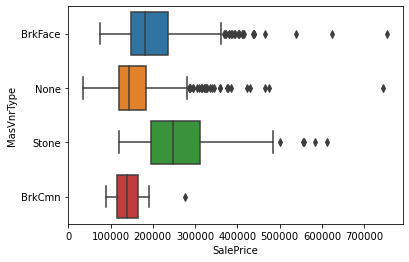

In [57]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')

sns.boxplot(data=df_train, x='SalePrice', y='MasVnrType')

#### 15. MasVnrArea : Masonary Veneer Area in square feet

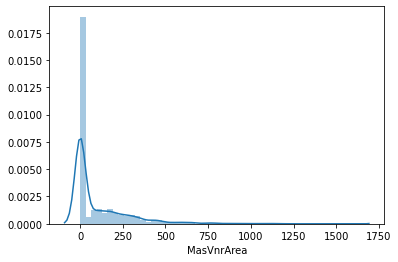

In [58]:
sns.distplot(df_train.MasVnrArea)

In [59]:
print('Maximum value: {}'.format(df_train.MasVnrArea.max()))
print('Minimun value: {}'.format(df_train.MasVnrArea.min()))

Maximum value: 1600.0
Minimun value: 0.0


Let's fill the missing value with Minimun

In [60]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train.MasVnrArea.min())
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test.MasVnrArea.min())

#### 16. Electrical

SBrkr  -  Standard Circuit Breakers & Romex  
FuseA  -  Fuse Box over 60 AMP and all Romex wiring (Average)   
FuseF  -  60 AMP Fuse Box and mostly Romex wiring (Fair)  
FuseP  -  60 AMP Fuse Box and mostly knob & tube wiring (poor)  
Mix - Mixed  

In [61]:
df_train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

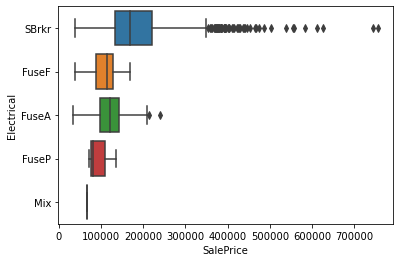

In [62]:
sns.boxplot(data=df_train, x='SalePrice', y='Electrical')

We will fill the missing values with the most frequently used one in training set only as there in no missing values in this feature for test set. ie., `SBrkr`  


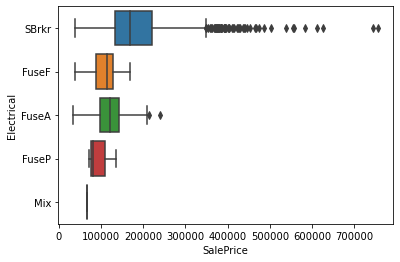

In [63]:
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr')

sns.boxplot(data=df_train, x='SalePrice', y='Electrical')

In [64]:
check_null(df_train)

Series([], dtype: float64)

Here we completed replacing the missing values which were both in Training set and Test set. Now there is mo missing value left in Training set, but still there are few in Test set which we will carry out replacing now. 

#### 17. MSZoning : Identifies the general zoning classification of the sale.  

   A  -  Agriculture  
   C  -  Commercial  
   FV -  Floating Village Residential  
   I  -  Industrial  
   RH -  Residential High Density  
   RL -  Residential Low Density  
   RP -  Residential Low Density Park   
   RM -  Residential Medium Density  

In [65]:
df_test.MSZoning.value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

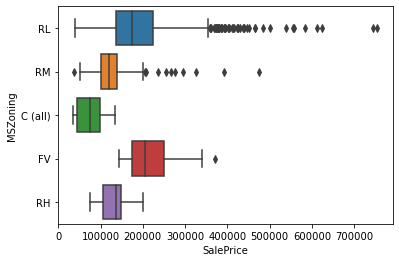

In [66]:
sns.boxplot(data=df_train, x='SalePrice', y='MSZoning')

Filling the missing values with the most frequent one in test set only as there is no missing value for this feature in training set. ie.,`RL`

In [67]:
df_test['MSZoning'] = df_test['MSZoning'].fillna('RL')

#### 18. Functional : Home Functionality (Assume typical unless deductions are warrented)

   Typ - Typical Functionality  
   Min1 - Minor Deductions 1  
   Min2 - Minor Deductions 2  
   Mod - Moderate Deductions  
   Maj1 - Major Deductions 1  
   Maj2 - Major Deductions 2  
   Sev - Severely Damaged  
   Sal - Salvage only

In [68]:
df_test.Functional.value_counts() 

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [69]:
df_train.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

Fill the missing value with most frequent value, which is `Typ`

In [70]:
df_test['Functional'] = df_test['Functional'].fillna('Typ')

#### 19.BsmtFullBath : Basement full bathrooms

In [71]:
df_test.BsmtFullBath.value_counts()

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [72]:
df_train.BsmtFullBath.value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

Fill the missing value with most frequent value, which is `0`

In [73]:
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna('0')

#### 20. BsmtHalfBath : Basement half bathrooms

In [74]:
df_test.BsmtHalfBath.value_counts()

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64

In [75]:
df_train.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

Fill the missing value with most frequent value, which is `0`

In [76]:
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna('0')

#### 21. Utilities: Type of utilities available

   AllPub -  All public Utilities (E,G,W,& S)    
   NoSewr -  Electricity, Gas, and Water (Septic Tank)  
   NoSeWa -  Electricity and Gas Only  
   ELO - Electricity only     

In [77]:
df_test.Utilities.value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [78]:
df_train.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Dropping this feature as it won't help our model.

In [79]:
df_train.drop('Utilities', axis=1, inplace=True)
df_test.drop('Utilities', axis=1, inplace=True)

#### 22. SaleType: Type of sale

   WD -  Warranty Deed - Conventional  
   CWD - Warranty Deed - Cash  
   VWD - Warranty Deed - VA Loan  
   New - Home just constructed and sold  
   COD - Court Officer Deed/Estate  
   Con - Contract 15% Down payment regular terms  
   ConLw  -  Contract Low Down payment and low interest  
   ConLI  -  Contract Low Interest  
   ConLD  -  Contract Low Down  
   Oth - Other  

In [80]:
df_test.SaleType.value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [81]:
df_train.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

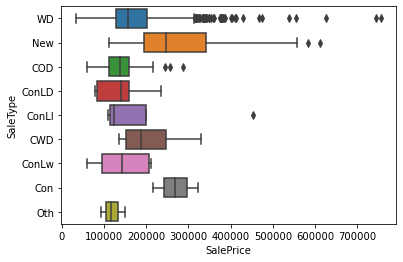

In [82]:
sns.boxplot(data=df_train, x='SalePrice', y='SaleType')

Replacing the missing value with the most frequent value, that is `WD`

In [83]:
df_test['SaleType'] = df_test['SaleType'].fillna('WD')

#### 23. GarageArea: Size of garage in square feet

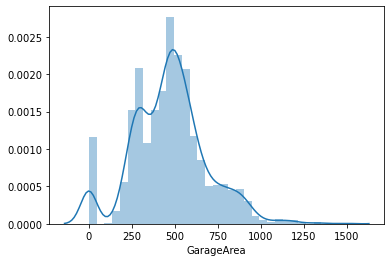

In [84]:
sns.distplot(df_test.GarageArea)

Fill the missing value with minimum value

In [85]:
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test.GarageArea.min())

#### 24.GarageCars : Size of garage in car capacity

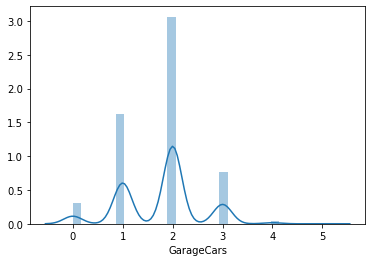

In [86]:
sns.distplot(df_test.GarageCars)

Fill the missing value with minimum value

In [87]:
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test.GarageCars.min())

#### 25. KitchenQual: Kitchen quality

In [88]:
df_test.KitchenQual.value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

Replacing with the most frequent value, `TA`

In [89]:
df_test['KitchenQual'] = df_test['KitchenQual'].fillna('TA')

#### 26. TotalBsmtSF: Total square feet of basement area

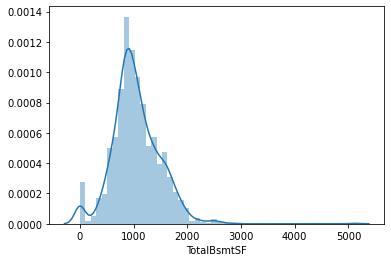

In [90]:
sns.distplot(df_test.TotalBsmtSF)

Filling the missing value with minimum value

In [91]:
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test.TotalBsmtSF.min())

**27. BsmtUnfSF: Unfinished square feet of basement area**
* BsmtFinSF1: Type 1 finished square feet  
* BsmtFinSF2: Type 2 finished square feet

We will replace the missing values with minimum values in all three features.

In [92]:
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(df_test.BsmtUnfSF.min())
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test.BsmtFinSF1.min())
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(df_test.BsmtFinSF2.min())

#### 28. Exterior1st: Exterior covering on house

   AsbShng - Asbestos Shingles  
   AsphShn - Asphalt Shingles  
   BrkComm - Brick Common  
   BrkFace - Brick Face  
   CBlock  - Cinder Block  
   CemntBd - Cement Board  
   HdBoard - Hard Board  
   ImStucc - Imitation Stucco  
   MetalSd - Metal Siding  
   Other   - Other  
   Plywood - Plywood  
   PreCast - PreCast   
   Stone   - Stone  
   Stucco  - Stucco  
   VinylSd - Vinyl Siding  
   Wd Sdng - Wood Siding  
   WdShing - Wood Shingles  

In [93]:
df_test.Exterior1st.value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [94]:
df_test['Exterior1st'] = df_test['Exterior1st'].fillna('VinylSd')

#### 29. Exterior2nd: Exterior covering on house (if more than one material)

In [95]:
df_test.Exterior2nd.value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64

In [96]:
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna('VinylSd')

In [97]:
check_null(df_train)
check_null(df_test)

Series([], dtype: float64)

So, here we completed filling all the missing values

### Temporal Variables (DateTime Variables)

In [98]:
year_features = [feature for feature in df_numerical
                 if 'Yr' in feature or 'Year' in feature]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [99]:
for feature in year_features:
    print('\n', feature, '\n', df_train[feature].unique())


 YearBuilt 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

 YearRemodAdd 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

 GarageYrBlt 
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.


Text(0.5, 1.0, 'House Prive vs YearSold')

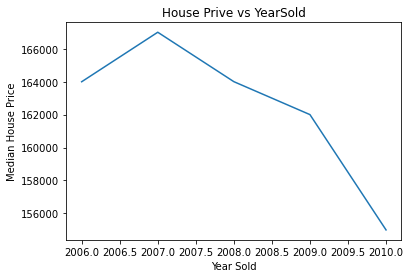

In [100]:
df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Prive vs YearSold')

for feature in year_features:
    if feature != 'YrSold':
        df_train[feature] = df_train['YrSold'] - df_train[feature]
        
        plt.scatter(df_train[feature], df_train['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

## Feature Engineering

In [101]:
from sklearn.preprocessing import OneHotEncoder

In [102]:
def concat_df(train, test):
    return pd.concat((train, test), sort=True).reset_index(drop=True)

In [103]:
df_all = concat_df(df_train, df_test)

In [104]:
df_all = df_all.drop(['SalePrice'], axis=1)

In [105]:
df_cat = df_all.select_dtypes(exclude = [np.number])

In [106]:
df_cat_dummies = pd.get_dummies(df_cat)

df_cat_dummies.head()

,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtFullBath_0,BsmtHalfBath_0,BsmtHalfBath_1,BsmtHalfBath_2,BsmtHalfBath_0,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,FireplaceQu_0,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageFinish_Fin,GarageFinish_Nog,GarageFinish_RFn,GarageFinish_Unf,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Nog,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0

In [107]:
print(df_all.shape)
print(df_cat.shape)
print(df_cat_dummies.shape)

(2919, 70)
(2919, 36)
(2919, 232)


In [108]:
df_all_features = df_all.join(df_cat_dummies)  # combined all features

In [109]:
df_all_features = df_all_features.drop(df_cat, axis=1)  # dropped original categorical features

In [110]:
df_all_features.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtFullBath_0,BsmtHalfBath_0,BsmtHalfBath_1,BsmtHalfBath_2,BsmtHalfBath_0,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,FireplaceQu_0,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageFinish_Fin,GarageFinish_Nog,GarageFinish_RFn,GarageFinish_Unf,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Nog,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLan

In [111]:
df_all_features.shape

(2919, 266)

## Model Training

In [112]:
def divide_df(df):
    return df.iloc[:1460], df.iloc[1460:]

In [113]:
X_train, X_test = divide_df(df_all_features)

In [114]:
y_train = df_train['SalePrice']

In [115]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1460, 266)
y_train shape: (1460,)
X_test shape: (1459, 266)


In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,mean_squared_error,make_scorer
from sklearn.ensemble import RandomForestRegressor

In [117]:
rf = make_pipeline(StandardScaler(), 
                   RandomForestRegressor(max_samples=1460, 
                                         n_estimators=5000, 
                                         min_samples_leaf=1, 
                                         random_state=14))
rf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_samples=1460, n_estimators=5000,
                                       random_state=14))])

In [118]:
check_null(X_train)

Series([], dtype: float64)

In [119]:
check_null(X_test)

Series([], dtype: float64)

In [120]:
pred = rf.predict(X_test)

### To CSV

In [121]:
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [122]:
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': pred })

In [123]:
submission.to_csv('Submission.csv', index=False)

In [124]:
submission.head()

,Id,SalePrice
0,1461,127884.6012
1,1462,154648.8550
2,1463,179153.4550
3,1464,182835.0104
4,1465,198992.6250
